In [15]:
# import the necessary libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Data Preprocessing

In [16]:
df = pd.read_csv("spam_emails.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [18]:
data = pd.get_dummies(df, columns=["Category"], drop_first=True)
data = data.rename(columns={"Category_spam":"Spam"})
data

,Message,Spam
0,"Go until jurong point, crazy.. Available only ...",False
1,Ok lar... Joking wif u oni...,False
2,Free entry in 2 a wkly comp to win FA Cup fina...,True
3,U dun say so early hor... U c already then say...,False
4,"Nah I don't think he goes to usf, he lives aro...",False
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,True
5568,Will ü b going to esplanade fr home?,False
5569,"Pity, * was in mood for that. So...any other s...",False
5570,The guy did some bitching but I acted like i'd...,False


In [19]:
# Splitting train and test data
X = data.Message    # feature
y = data.Spam       # label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [20]:
# find word count and store as metrix
cv = CountVectorizer()
X_train_wcount = cv.fit_transform(X_train.values)

Train The Model

In [21]:
# train model
model = MultinomialNB()
model.fit(X_train_wcount, y_train)

MultinomialNB()

Pre-Test

In [23]:
# pre-test
email = ["hello, i hope you are fine.","you just won prize money worth 100000 bucks."]
email_wcount = cv.transform(email)
model.predict(email_wcount)

array([False,  True])

Test The Model

In [10]:
# test-model
X_test_wcount = cv.transform(X_test)
y_pred = model.predict(X_test_wcount)

# Alternative method for finding accuracy - model.score(X_test_wcount, y_test)

Evaluate Model Perfomance

In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7698519515477793
Precision: 0.13780918727915195
Recall: 0.1266233766233766


Visualize

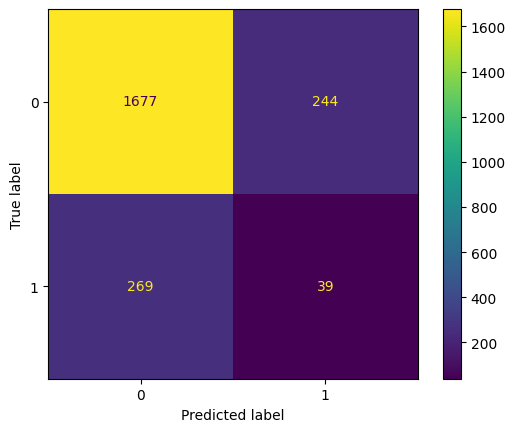

In [25]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()